# Tutorial 1: Intro to FDTD

This tutorial will walk you through setting up a simple dipole radiation simulation in Tidy3d.

For more details, refer to the [Tidy3d documentation](https://docs.simulation.cloud/projects/tidy3d/en/latest).

## Setup

First we import Tidy3d and the other packages needed.  If it is not installed, please do so with `pip install tidy3d-beta`.


In [1]:
# imports
import matplotlib.pylab as plt

import tidy3d as td
import tidy3d.web as web

Then, we will define the basic simulation parameters.  Note that the length scale is microns.

In [2]:
# simulation parameters
side_length = 9.0
grid_size = 50e-3
pml_layers = [td.PML(), td.PML(), td.PML()]

# spectrum and resolution parameters
lambda0 = 1.0
freq0 = td.C_0 / lambda0
fwidth = freq0 / 50
run_time = 200 / freq0

Next, we define the objects present in our simulation, specifically the source and monitor.

In [3]:
# define dipole source at origin pointing in z
dipole_source = td.PointDipole(
    center=(0, 0, 0),
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
    polarization='Ez',
)

In [4]:
# define monitor to measure fields in xz plane at central frequency
monitor = td.FieldMonitor(
    center=(0,0,0),
    size=(td.inf, 0, td.inf),
    freqs=[freq0],
    name='freq_domain',
)

And finally, we put everything together in a `Simulation` object, which contains all of the specs needed to run the simulation.

In [6]:
# define simulation
simulation = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    pml_layers=pml_layers,
)

## Running Simulation

To run the simulation, we will call the `web.run()` function, passing our `Simulation` and some parameters about the task name and the path to download the data file.

In [7]:
# run simulation
sim_data = web.run(simulation, task_name='movie', path='out/data.hdf5')

[09:20:51] INFO     Using Tidy3D credentials from stored file                      ]8;id=857379;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/auth.py\auth.py]8;;\:]8;id=964810;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/auth.py#74\74]8;;\

[09:20:55] INFO     Uploaded task 'movie' with task_id                          ]8;id=274396;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=313387;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#120\120]8;;\
                    '6a6c5009-5276-4f68-85ff-6c7ce76e79c9'.

[09:20:57] INFO     Maximum flex unit cost: 0.20                                ]8;id=223311;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=678364;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#141\141]8;;\

Output()

[09:21:06] INFO     status = preprocess                                         ]8;id=827842;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=580074;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#263\263]8;;\

[09:21:25] INFO     starting up solver                                          ]8;id=566797;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=592463;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#267\267]8;;\

[09:21:41] INFO     running solver                                              ]8;id=120539;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=262054;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#272\272]8;;\

Output()

[09:21:45] INFO     early shutoff detected, exiting.                            ]8;id=507645;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=188719;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#282\282]8;;\

% done (field decay = 4.21e-07) ━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━  36% -:--:--

Output()

[09:21:49] INFO     status = postprocess                                        ]8;id=771764;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=883058;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#291\291]8;;\

[09:21:55] INFO     status = success                                            ]8;id=282367;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=345588;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#296\296]8;;\

[09:21:56] INFO     downloading file "monitor_data.hdf5" to "out/data.hdf5"     ]8;id=580444;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=490914;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#522\522]8;;\

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[09:21:57] INFO     loading SimulationData from out/data.hdf5                   ]8;id=176947;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=657663;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#357\357]8;;\

## Post Run Analysis

After the job is done, all of the data is loaded into the `SimulationData` object called `sim_data` in this example.

From this, we can plot the results and make sure it looks reasonable.

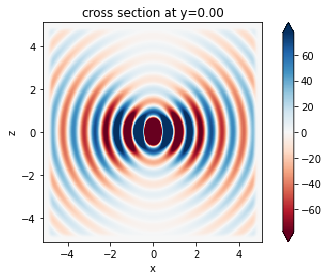

In [8]:
# check that frequency domain fields look good
ax = sim_data.plot_field('freq_domain', 'Ez', y=0, freq=freq0)
plt.show()

## Adding Complexity

To make things more intereting, let's run the same simulation, but adding a few structures in the mix. For now, let's just add a few dielectric box objects to see how that changes the results.

In [9]:
# define the boxes
epsilon_box = 3
center_offset_box = 1.6
size_box = 1.8

box_top = td.Structure(
    geometry=td.Box(
        center=(0, 0, center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=td.Medium(permittivity=epsilon_box)
)

bot_bot_r = td.Structure(
    geometry=td.Box(
        center=(+center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=td.Medium(permittivity=epsilon_box)
)

bot_bot_l = td.Structure(
    geometry=td.Box(
        center=(-center_offset_box, 0, -center_offset_box),
        size=(size_box, size_box, size_box),
    ),
    medium=td.Medium(permittivity=epsilon_box)
)

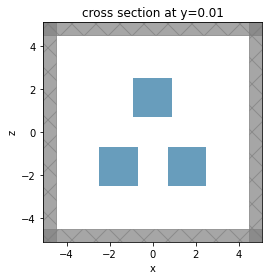

In [10]:
# make a new simulation with the boxes added
simulation_boxes = td.Simulation(
    size=(side_length, side_length, side_length),
    grid_spec=td.GridSpec.uniform(dl=grid_size),
    structures=[box_top, bot_bot_r, bot_bot_l],
    sources=[dipole_source],
    monitors=[monitor],
    run_time=run_time,
    pml_layers=pml_layers,
)

# visualize the simulation first, before running
ax = simulation_boxes.plot(y=0.01)
plt.show()

In [11]:
# run simulation
sim_data_boxes = web.run(simulation_boxes, task_name='movie_boxes', path='out/data.hdf5')

[09:22:00] INFO     Uploaded task 'movie_boxes' with task_id                    ]8;id=906045;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=944825;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#120\120]8;;\
                    '0eefde80-a002-4984-8388-edef29edddbc'.

[09:22:02] INFO     Maximum flex unit cost: 0.20                                ]8;id=29951;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=788848;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#141\141]8;;\

Output()

[09:22:10] INFO     status = preprocess                                         ]8;id=898048;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=767813;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#263\263]8;;\

[09:22:25] INFO     starting up solver                                          ]8;id=641896;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=89360;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#267\267]8;;\

[09:22:45] INFO     running solver                                              ]8;id=855730;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=426101;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#272\272]8;;\

Output()

% done (field decay = 6.46e-06) ━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━  56% -:--:--

Output()

[09:22:52] INFO     status = postprocess                                        ]8;id=326390;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=710702;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#291\291]8;;\

[09:23:04] INFO     status = success                                            ]8;id=59322;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=596361;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#296\296]8;;\

[09:23:05] INFO     downloading file "monitor_data.hdf5" to "out/data.hdf5"     ]8;id=572313;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=837186;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#522\522]8;;\

Output()

Downloading... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00

[09:23:06] INFO     loading SimulationData from out/data.hdf5                   ]8;id=715238;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py\webapi.py]8;;\:]8;id=460309;file:///Users/twhughes/Documents/Flexcompute/tidy3d-docs/tidy3d/tidy3d/web/webapi.py#357\357]8;;\

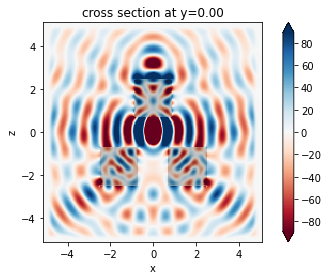

In [12]:
ax = sim_data_boxes.plot_field('freq_domain', 'Ez', y=0, freq=freq0)
plt.show()